In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# Load datasets
dataset1 = pd.read_csv(r'C:\Users\ASUS\Desktop\Semester 1, 2\Foundation of Data Science\data\dataset1.csv')
dataset2 = pd.read_csv(r'C:\Users\ASUS\Desktop\Semester 1, 2\Foundation of Data Science\data\dataset2.csv')
dataset3 = pd.read_csv(r'C:\Users\ASUS\Desktop\Semester 1, 2\Foundation of Data Science\data\dataset3.csv')

In [11]:
#merge data
merged_data = dataset1.merge(dataset2, on='ID').merge(dataset3, on='ID')
merged_data.to_csv(r'C:\Users\ASUS\Desktop\Semester 1, 2\Foundation of Data Science\data\merged_data.csv', index=False)

In [12]:
#inspect & clean data
print(merged_data.isnull().sum())

 # Inspect outliers and distributions in a easy manner
with open('description.txt', 'w') as f:
    f.write(merged_data.describe().to_string())

print(merged_data.describe())

ID          0
gender      0
minority    0
deprived    0
C_we        0
C_wk        0
G_we        0
G_wk        0
S_we        0
S_wk        0
T_we        0
T_wk        0
Optm        0
Usef        0
Relx        0
Intp        0
Engs        0
Dealpr      0
Thcklr      0
Goodme      0
Clsep       0
Conf        0
Mkmind      0
Loved       0
Intthg      0
Cheer       0
dtype: int64
                 ID        gender      minority      deprived          C_we  \
count  9.827800e+04  98278.000000  98278.000000  98278.000000  98278.000000   
mean   1.059895e+06      0.472059      0.226572      0.424022      2.198483   
std    3.479310e+04      0.499221      0.418615      0.494196      2.069802   
min    1.000002e+06      0.000000      0.000000      0.000000      0.000000   
25%    1.029695e+06      0.000000      0.000000      0.000000      0.500000   
50%    1.059692e+06      0.000000      0.000000      0.000000      2.000000   
75%    1.090143e+06      1.000000      0.000000      1.000000      3.0

gender
0    51885
1    46393
Name: count, dtype: int64


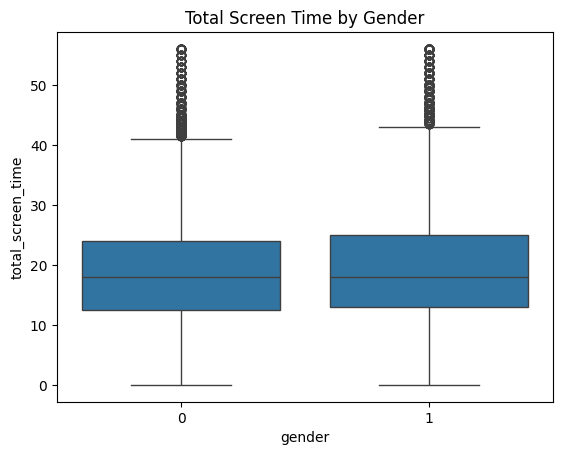

In [13]:
##Investigation 1: Gender Distribution:M vs F
gender_distribution = merged_data['gender'].value_counts()
print(gender_distribution)

# Boxplot: Gender vs. Total Screen Time (weekdays + weekends)
screen_time_columns = ['C_we', 'C_wk', 'G_we', 'G_wk', 'S_we', 'S_wk', 'T_we', 'T_wk']
merged_data['total_screen_time'] = merged_data[screen_time_columns].sum(axis=1)
sns.boxplot(x='gender', y='total_screen_time', data=merged_data)
plt.title('Total Screen Time by Gender')
plt.show()

              C_we      C_wk      G_we      G_wk      S_we      S_wk  \
minority                                                               
0         2.127771  1.714226  1.801877  1.080751  3.506907  2.912881   
1         2.439866  1.951969  1.468451  0.714757  3.494454  2.810145   

              T_we      T_wk  
minority                      
0         3.596223  2.556531  
1         3.822271  2.534962  


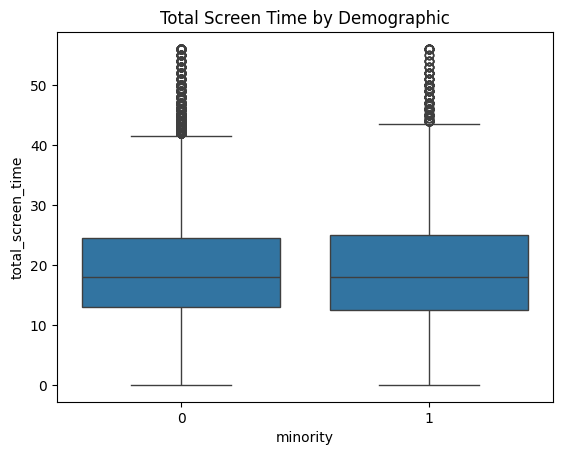

In [14]:
##Investigation 2: Screen Time Across Demographic Groups
avg_screen_time_by_minority = merged_data.groupby('minority')[screen_time_columns].mean()
print(avg_screen_time_by_minority)
with open('usgae-demographic.txt', 'w') as f:
    f.write(avg_screen_time_by_minority.to_string())
    
# Boxplot: Minority/Majority vs. Total Screen Time (weekdays + weekends)
sns.boxplot(x='minority', y='total_screen_time', data=merged_data)
plt.title('Total Screen Time by Demographic')
plt.show()

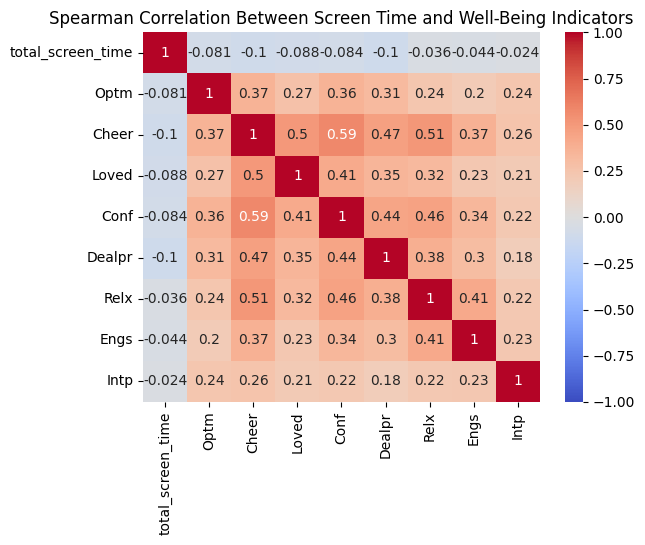

In [15]:
##Investigation 3: Well-being scores based on screen-time
# Calculate the Spearman correlation matrix in heatmap (as there's ordinal data used: 1-5 rating)
spearman_corr_matrix = merged_data[['total_screen_time', 'Optm', 'Cheer', 'Loved', 'Conf', 'Dealpr', 'Relx', 'Engs', 'Intp']].corr(method='spearman')
sns.heatmap(spearman_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Spearman Correlation Between Screen Time and Well-Being Indicators')
plt.show()

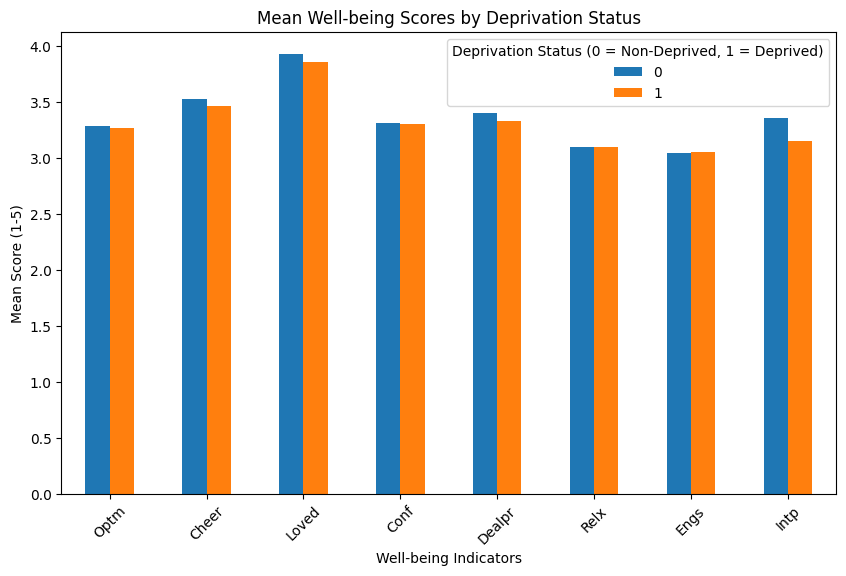

In [16]:
#Investigation 4: Bar plot for mean well-being scores by deprivation status
# List of well-being indicators to analyze
well_being_indicators = ['Optm', 'Cheer', 'Loved', 'Conf', 'Dealpr', 'Relx', 'Engs', 'Intp']

# Calculate & plot mean well-being scores by deprivation status
mean_well_being_by_deprivation = merged_data.groupby('deprived')[well_being_indicators].mean()
mean_well_being_by_deprivation.T.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Well-being Scores by Deprivation Status')
plt.xlabel('Well-being Indicators')
plt.ylabel('Mean Score (1-5)')
plt.xticks(rotation=45)
plt.legend(title='Deprivation Status (0 = Non-Deprived, 1 = Deprived)')
plt.show()